In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [267]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [268]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [269]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


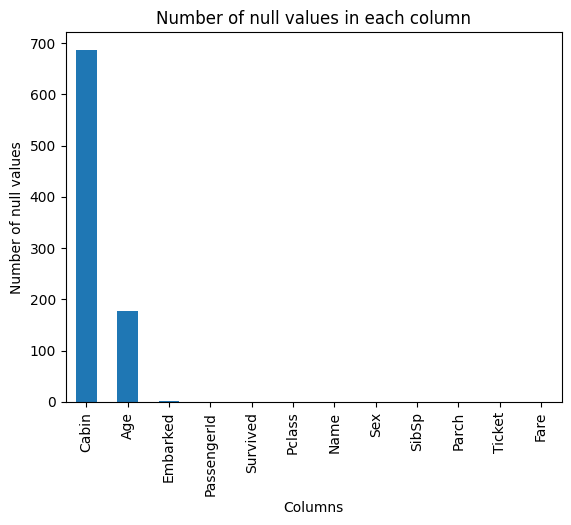

In [270]:
titanull_values = titanic.isnull().sum().sort_values(ascending=False)
print(titanull_values)
titanull_values.plot(kind='bar')
plt.title('Number of null values in each column')
plt.xlabel('Columns')
plt.ylabel('Number of null values')
plt.show()

In [271]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [272]:
titanic_eda=titanic.copy()

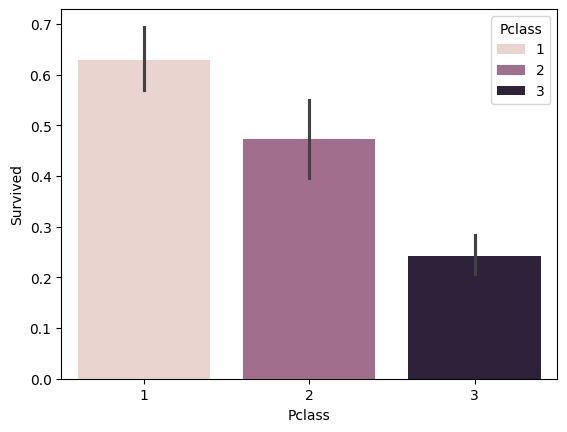

In [273]:
sns.barplot(data=titanic_eda,x='Pclass',y='Survived', hue='Pclass')
plt.show()

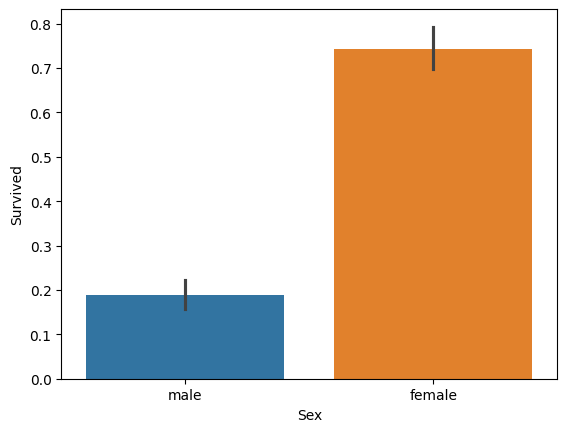

In [274]:
sns.barplot(data=titanic_eda, x='Sex', y='Survived', hue='Sex')
plt.show()

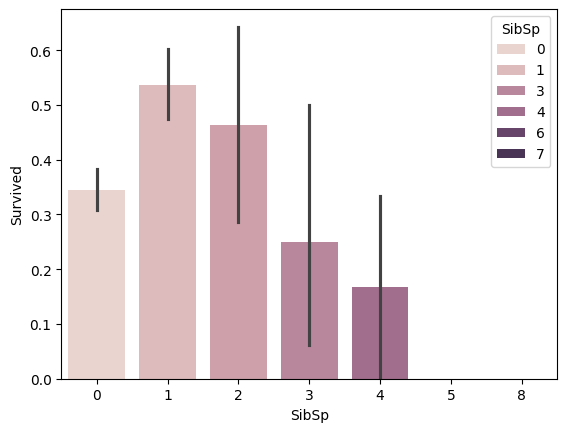

In [275]:
sns.barplot(data=titanic_eda,x='SibSp',y='Survived',hue='SibSp')
plt.show()

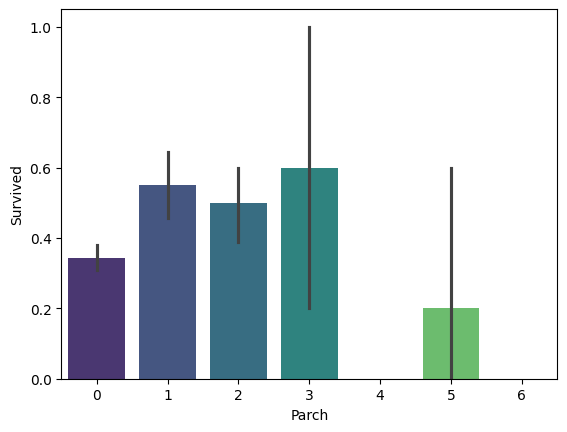

In [276]:
sns.barplot(data=titanic_eda,x='Parch',y='Survived',palette='viridis')
plt.show()

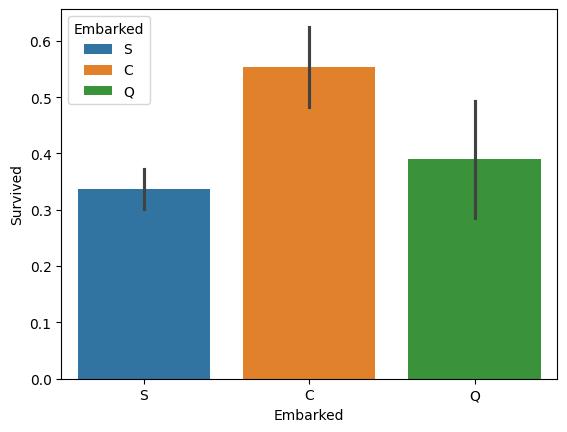

In [277]:
sns.barplot(data=titanic_eda, x='Embarked', y='Survived', hue='Embarked')
plt.show()

In [278]:
fare_bins = [0, 10, 50, 100, np.inf]
fare_labels = ['Low', 'Medium', 'High', 'Very high']
titanic_eda['FareCat'] = pd.cut(titanic_eda['Fare'], bins=fare_bins, labels=fare_labels)

age_bins = [0, 12, 18, 35, 60, np.inf]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
titanic_eda['AgeCat'] = pd.cut(titanic_eda['Age'], bins=age_bins, labels=age_labels)

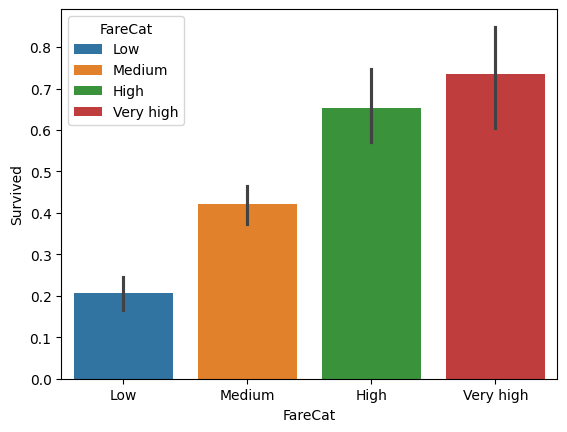

In [279]:
sns.barplot(data=titanic_eda, x='FareCat', y='Survived', hue='FareCat')
plt.show()

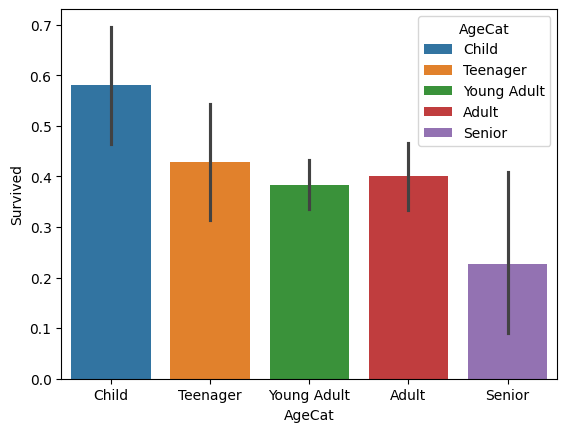

In [280]:
sns.barplot(data=titanic_eda, x='AgeCat', y='Survived', hue='AgeCat')
plt.show()

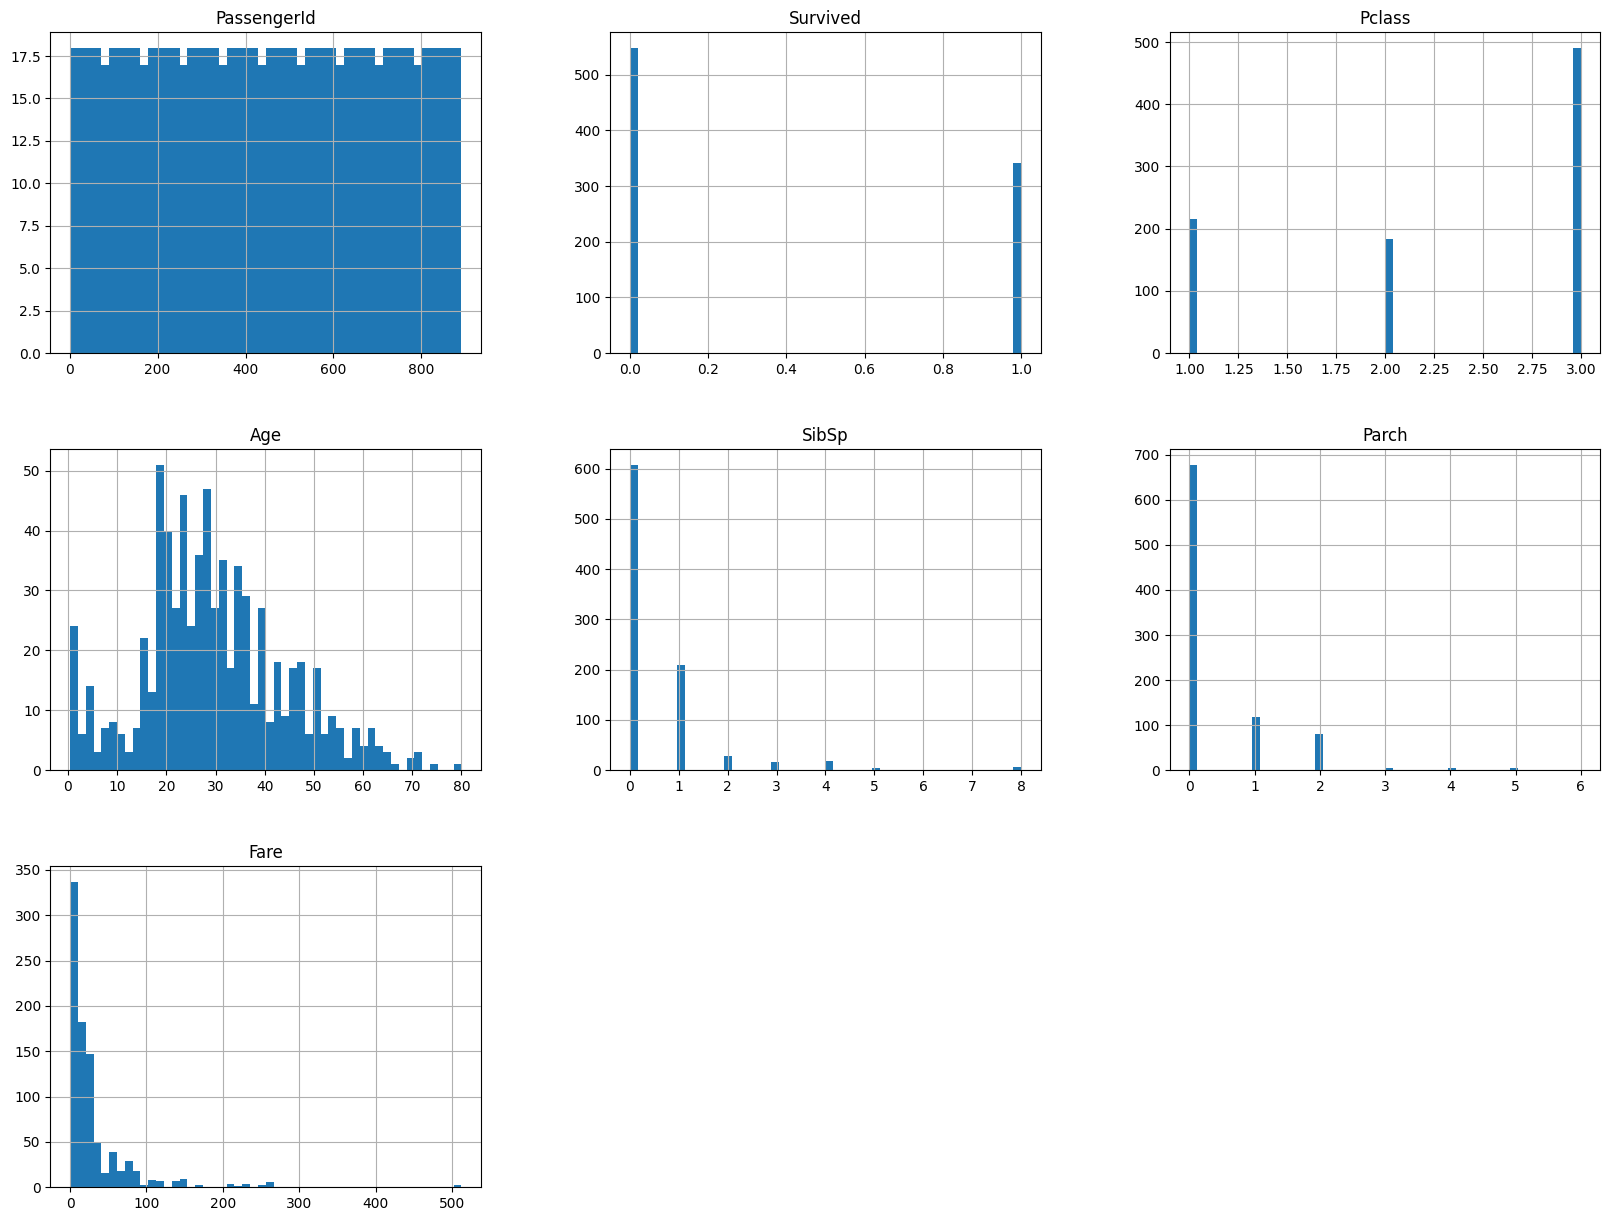

In [281]:
titanic_eda.hist(bins=50, figsize=(20, 15))
plt.show()

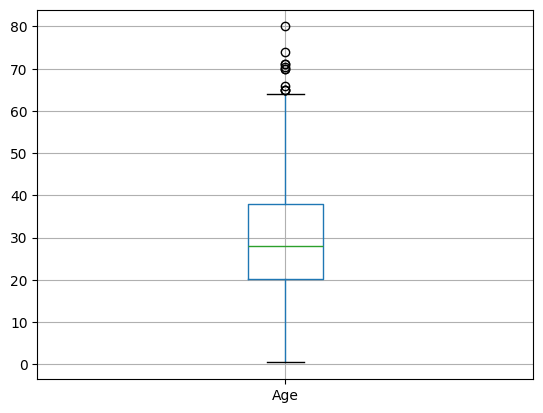

In [282]:
titanic_eda.boxplot(column='Age')
plt.show()

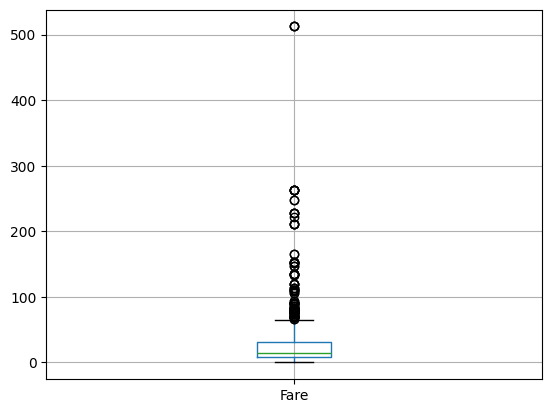

In [283]:
titanic_eda.boxplot(column='Fare')
plt.show()

In [284]:
titanic_eda['IsAlone'] = (titanic_eda['SibSp'] + titanic_eda['Parch']).apply(lambda x: 1 if x>0 else 0)
titanic_eda['Family'] = titanic_eda['SibSp'] + titanic_eda['Parch']

In [285]:
titanic_eda['Title'] = titanic_eda['Name'].str.extract(', ([A-Za-z]+)\.')
titanic_eda['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', nan, 'Jonkheer'],
      dtype=object)

Survived       1.000000
Fare           0.257307
IsAlone        0.203367
Parch          0.081629
Family         0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


<Axes: >

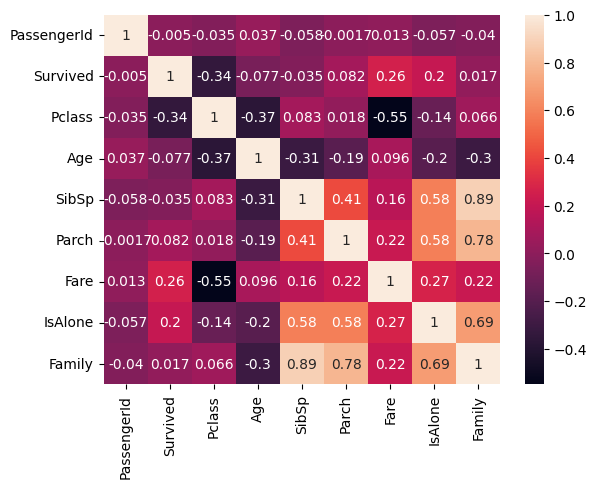

In [286]:
corr_matrix=titanic_eda.corr(numeric_only=True)
print(corr_matrix['Survived'].sort_values(ascending=False))
sns.heatmap(corr_matrix, annot=True)

In [287]:
titanic.dropna(subset=['Embarked'], inplace=True)

In [288]:
from sklearn.model_selection import train_test_split
X = titanic.drop(columns=['Survived'])
y = titanic['Survived']

In [289]:
X['Title'] = X['Name'].str.extract(', ([A-Za-z]+)\.')

fare_bins = [0, 10, 50, 100, np.inf]
fare_labels = ['Low', 'Medium', 'High', 'Very high']
X['FareCat'] = pd.cut(X['Fare'], bins=fare_bins, labels=fare_labels)

age_bins = [0, 12, 18, 35, 60, np.inf]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
X['Age'] = X['Age'].fillna(X['Age'].median())
X['AgeCat'] = pd.cut(X['Age'], bins=age_bins, labels=age_labels)

X['Pclass'] = X['Pclass'].apply(str)

In [290]:
X.drop(columns=['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin'], inplace=True)

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=titanic['Sex'], random_state=42)

In [292]:
from sklearn.base import BaseEstimator, TransformerMixin
sibsp_ix, parch_ix = 0, 1
class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        IsAlone = X[:, sibsp_ix] + X[:, parch_ix]
        IsAlone = np.where(IsAlone > 0, 1, 0)
        X = np.c_[X, IsAlone]
        
        return X

In [293]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attrib_adder', CombinedAttributeAdder()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

full_pipeline = ColumnTransformer([
    ('num_attribs', num_pipeline, ['SibSp', 'Parch']),
    ('cat', cat_pipeline, ['Sex', 'Pclass', 'Embarked', 'Title', 'AgeCat', 'FareCat'])
])

processed_X_train = full_pipeline.fit_transform(X_train)
processed_X_test = full_pipeline.transform(X_test)

In [294]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,FareCat,AgeCat
100,3,female,0,0,S,Miss,Low,Young Adult
158,3,male,0,0,S,Mr,Low,Young Adult
111,3,female,1,0,C,Miss,Medium,Teenager
621,1,male,1,0,S,Mr,High,Adult
121,3,male,0,0,S,Mr,Low,Young Adult


In [295]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(processed_X_train, y_train)
train_pred=lr.predict(processed_X_train)
test_pred=lr.predict(processed_X_test)
print(classification_report(y_train, train_pred))
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       439
           1       0.78      0.75      0.77       272

    accuracy                           0.83       711
   macro avg       0.82      0.81      0.81       711
weighted avg       0.82      0.83      0.82       711

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       110
           1       0.83      0.81      0.82        68

    accuracy                           0.87       178
   macro avg       0.86      0.85      0.86       178
weighted avg       0.86      0.87      0.86       178



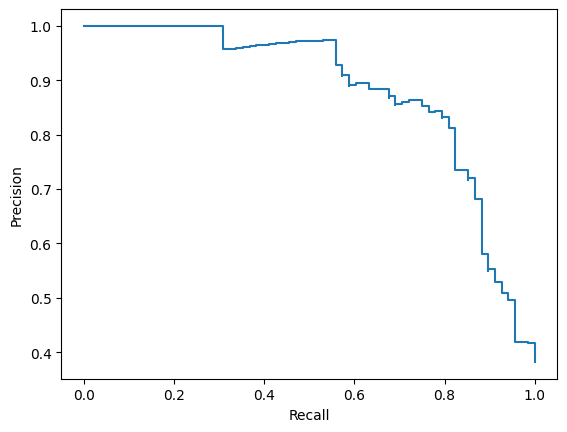

In [296]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, average_precision_score


y_pred = cross_val_predict(lr, processed_X_train, y_train, cv=5)

precision, recall, _ = precision_recall_curve(y_test, lr.predict_proba(processed_X_test)[:, 1])

plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

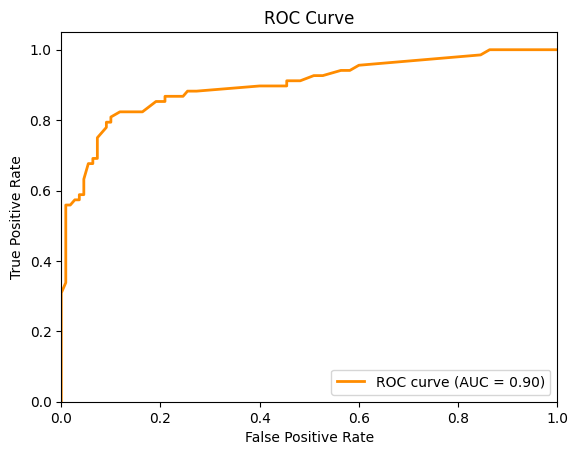

In [297]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(processed_X_test)[:, 1])
roc_auc = roc_auc_score(y_test, lr.predict_proba(processed_X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [300]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=4000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        max_features='sqrt',
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Voting System': VotingClassifier(
        estimators=[
            ('Logistic Regression', LogisticRegression(max_iter=4000, random_state=42)),
            ('Random Forest', RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                max_features='sqrt',
                random_state=42
            )),
            ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
        ],
        voting='soft'
    )
}

results = {}
for model_name, model in models.items():
    model.fit(processed_X_train, y_train)
    y_pred = model.predict(processed_X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    print(f'{model_name} Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('------------------------------------------------------')

print('Model comparison:')
for model_name, accuracy in results.items():
    print(f'{model_name}: {accuracy:.4f}')


Logistic Regression Accuracy: 0.8652
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       110
           1       0.83      0.81      0.82        68

    accuracy                           0.87       178
   macro avg       0.86      0.85      0.86       178
weighted avg       0.86      0.87      0.86       178

Confusion Matrix:
[[99 11]
 [13 55]]
------------------------------------------------------
Decision Tree Accuracy: 0.8202
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.69      0.75        68

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178

Confusion Matrix:
[[99 11]
 [21 47]]
------------------------------------------------------
Random Forest Accuracy: 0.8427
Classification Re

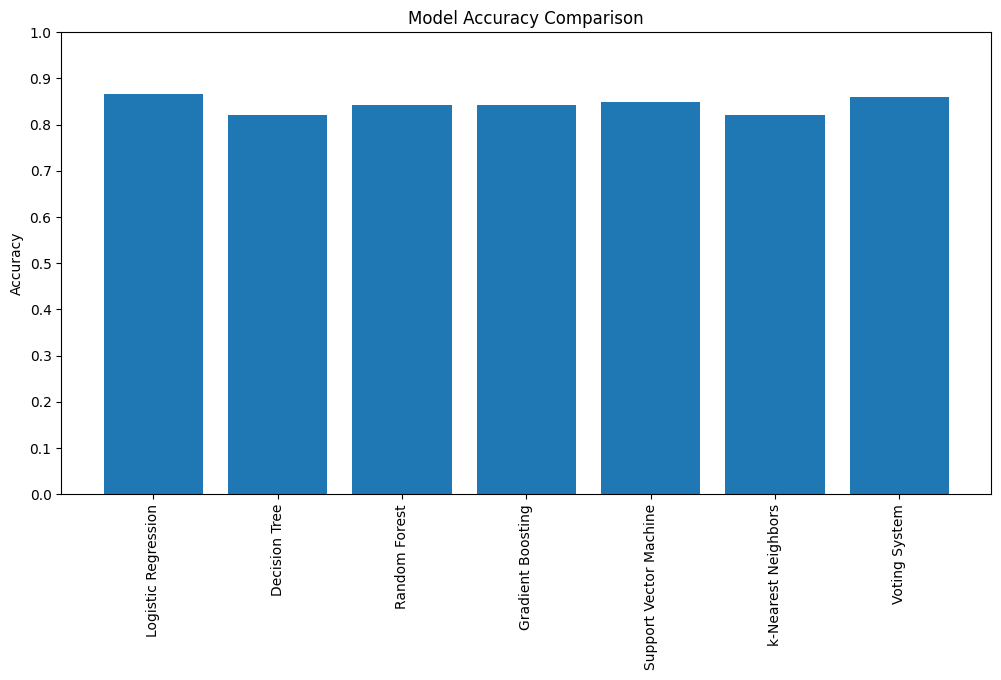

In [301]:
import matplotlib.pyplot as plt

model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies)
plt.xticks(rotation=90)
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [ ]:
# The best model accuracy is Logestic regression

model = lr

In [ ]:
test_data = pd.read_csv(r'D:\Titanic\test.csv')

In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test_data['Title'] = test_data['Name'].str.extract(', ([A-Za-z]+)\.')

fare_bins = [0, 10, 50, 100, np.inf]
fare_labels = ['Low', 'Medium', 'High', 'Very high']
test_data['FareCat'] = pd.cut(test_data['Fare'], bins=fare_bins, labels=fare_labels)

age_bins = [0, 12, 18, 35, 60, np.inf]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['AgeCat'] = pd.cut(test_data['Age'], bins=age_bins, labels=age_labels)

test_data['Pclass'] = test_data['Pclass'].apply(str)

In [ ]:
test_data.drop(columns=['Name', 'Age', 'Ticket', 'Fare', 'Cabin'], inplace=True)

In [ ]:
processed_test_data = full_pipeline.transform(test_data)

In [ ]:
predictions = model.predict(processed_test_data)

In [ ]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})

In [ ]:
submission.to_csv('submission.csv', index=False)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


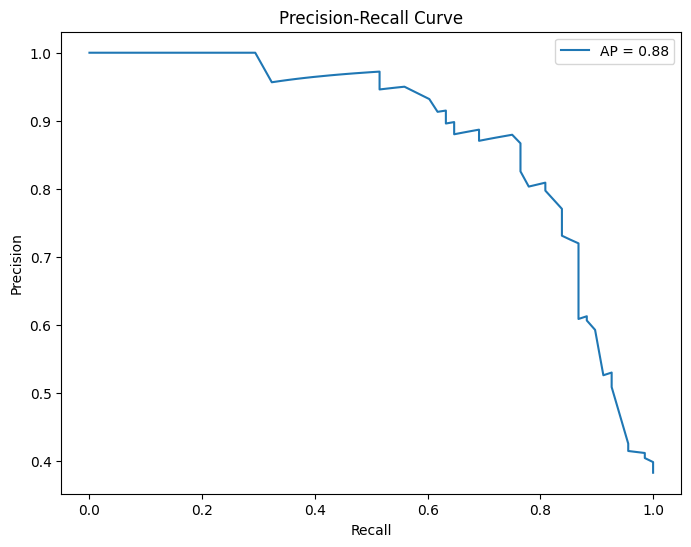

In [ ]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='average_precision', n_jobs=-1, verbose=2)
grid_search.fit(processed_X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Evaluate on test set
y_scores = best_model.predict_proba(processed_X_test)[:, 1]

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()